## <div align="center"> FINAL PROJECT DATA ANALYSIS </div>

#### Anggota Kelompok :
- Charles Gunawan - 00000118198
- Hazel Louis - 00000117599
- Ardiyan Froncesko - 00000136795

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [25]:
target = "price_range"

In [26]:
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [27]:
test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


In [28]:
train.shape

(2000, 21)

In [29]:
test.shape

(1000, 21)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [32]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [33]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


## Data Preprocessing

In [34]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [35]:
print("Target distribution:", train[target].value_counts().sort_index())
print("Duplicate rows:", train.duplicated().sum())

Target distribution: price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64
Duplicate rows: 0


In [36]:
numeric_cols = train.drop(columns=["price_range"]).select_dtypes(include="number").columns

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), lower, upper

outlier_summary = {}

for col in numeric_cols:
    count, lower, upper = detect_outliers_iqr(train[col])
    outlier_summary[col] = {
        "Outlier Count": count,
        "Lower Bound": round(lower, 2),
        "Upper Bound": round(upper, 2)
    }

outlier_train = pd.DataFrame(outlier_summary).T
print(outlier_train)

               Outlier Count  Lower Bound  Upper Bound
battery_power            0.0      -293.50      2760.50
blue                     0.0        -1.50         2.50
clock_speed              0.0        -1.55         4.45
dual_sim                 0.0        -1.50         2.50
fc                      18.0        -8.00        16.00
four_g                   0.0        -1.50         2.50
int_memory               0.0       -32.00        96.00
m_dep                    0.0        -0.70         1.70
mobile_wt                0.0        17.50       261.50
n_cores                  0.0        -3.00        13.00
pc                       0.0       -10.00        30.00
px_height                2.0      -714.00      1944.00
px_width                 0.0      -262.62      2770.38
ram                      0.0     -1578.00      5850.00
sc_h                     0.0        -1.50        26.50
sc_w                     0.0        -8.50        19.50
talk_time                0.0        -9.00        31.00
three_g   

NameError: name 'os' is not defined

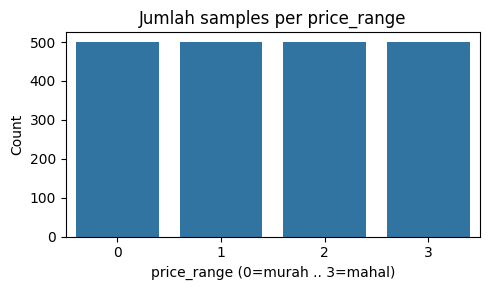

In [37]:
# Countplot of price_range
plt.figure(figsize=(5,3))
sns.countplot(x=target, data=train)
plt.title("Jumlah samples per price_range")
plt.xlabel("price_range (0=murah .. 3=mahal)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "count_price_range.png"))
plt.show()

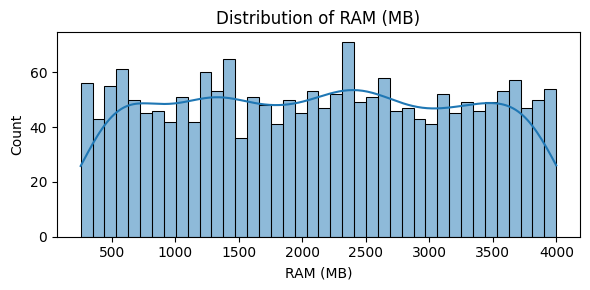

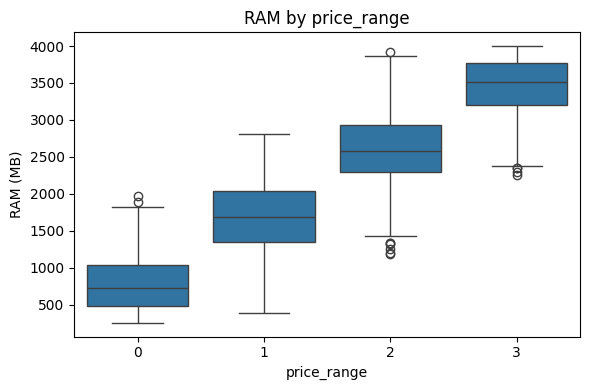

In [38]:
# Distribusi RAM (histogram + KDE) dan overlay median per kelas
plt.figure(figsize=(6,3))
sns.histplot(train["ram"], kde=True, bins=40)
plt.title("Distribution of RAM (MB)")
plt.xlabel("RAM (MB)")
plt.tight_layout()
plt.show()

# Boxplot RAM vs price_range
plt.figure(figsize=(6,4))
sns.boxplot(x=target, y="ram", data=train)
plt.title("RAM by price_range")
plt.xlabel("price_range")
plt.ylabel("RAM (MB)")
plt.tight_layout()
plt.show()

C:\Users\Hazel\AppData\Local\Temp\ipykernel_30696\2907636717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price_range", y="battery_power", data=train, palette="coolwarm")


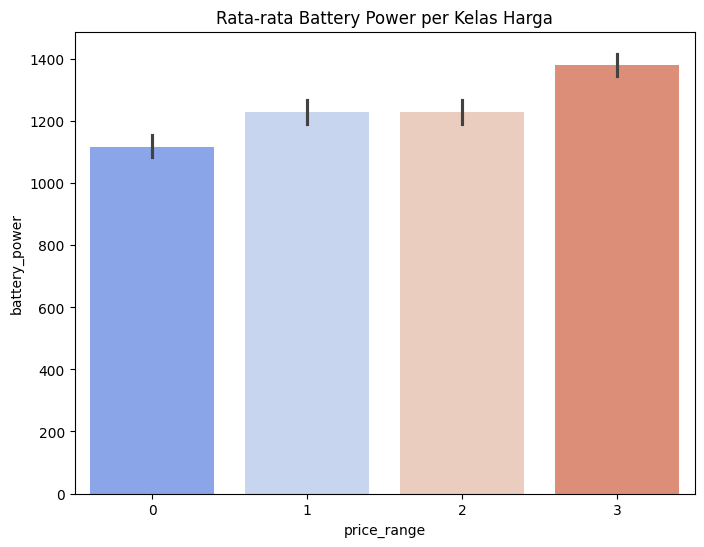

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x="price_range", y="battery_power", data=train, palette="coolwarm")
plt.title("Rata-rata Battery Power per Kelas Harga")
plt.show()

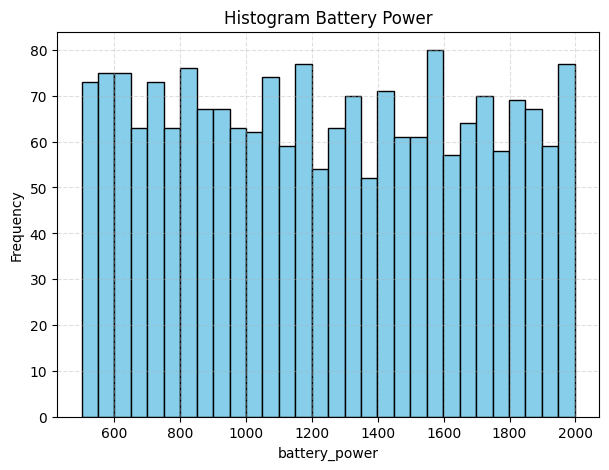

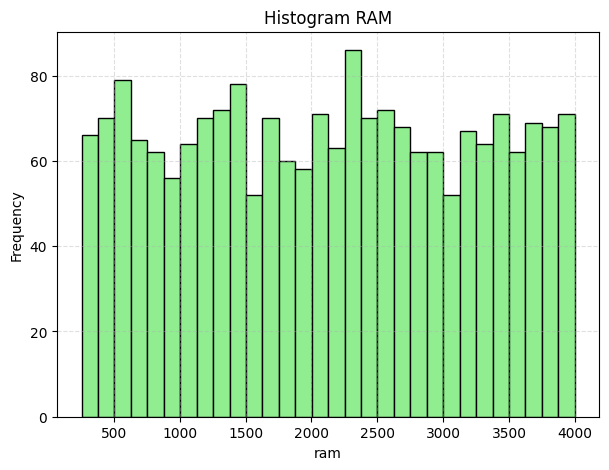

In [40]:
plt.figure(figsize=(7,5))
plt.hist(train["battery_power"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram Battery Power")
plt.xlabel("battery_power")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

plt.figure(figsize=(7,5))
plt.hist(train["ram"], bins=30, color="lightgreen", edgecolor="black")
plt.title("Histogram RAM")
plt.xlabel("ram")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

C:\Users\Hazel\AppData\Local\Temp\ipykernel_30696\382912148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="int_memory", data=train, palette="Set2")


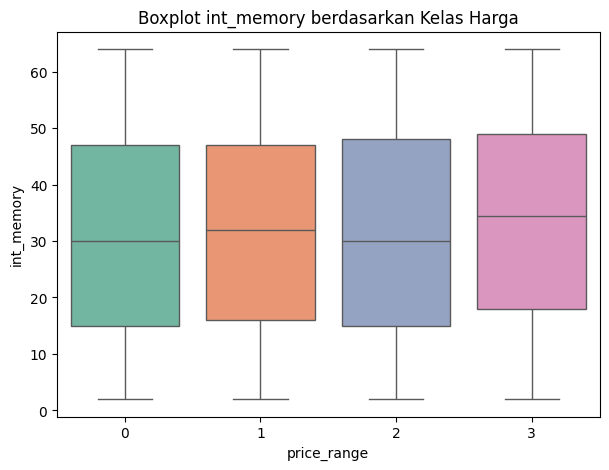

In [41]:
plt.figure(figsize=(7,5))
sns.boxplot(x="price_range", y="int_memory", data=train, palette="Set2")
plt.title("Boxplot int_memory berdasarkan Kelas Harga")
plt.show()

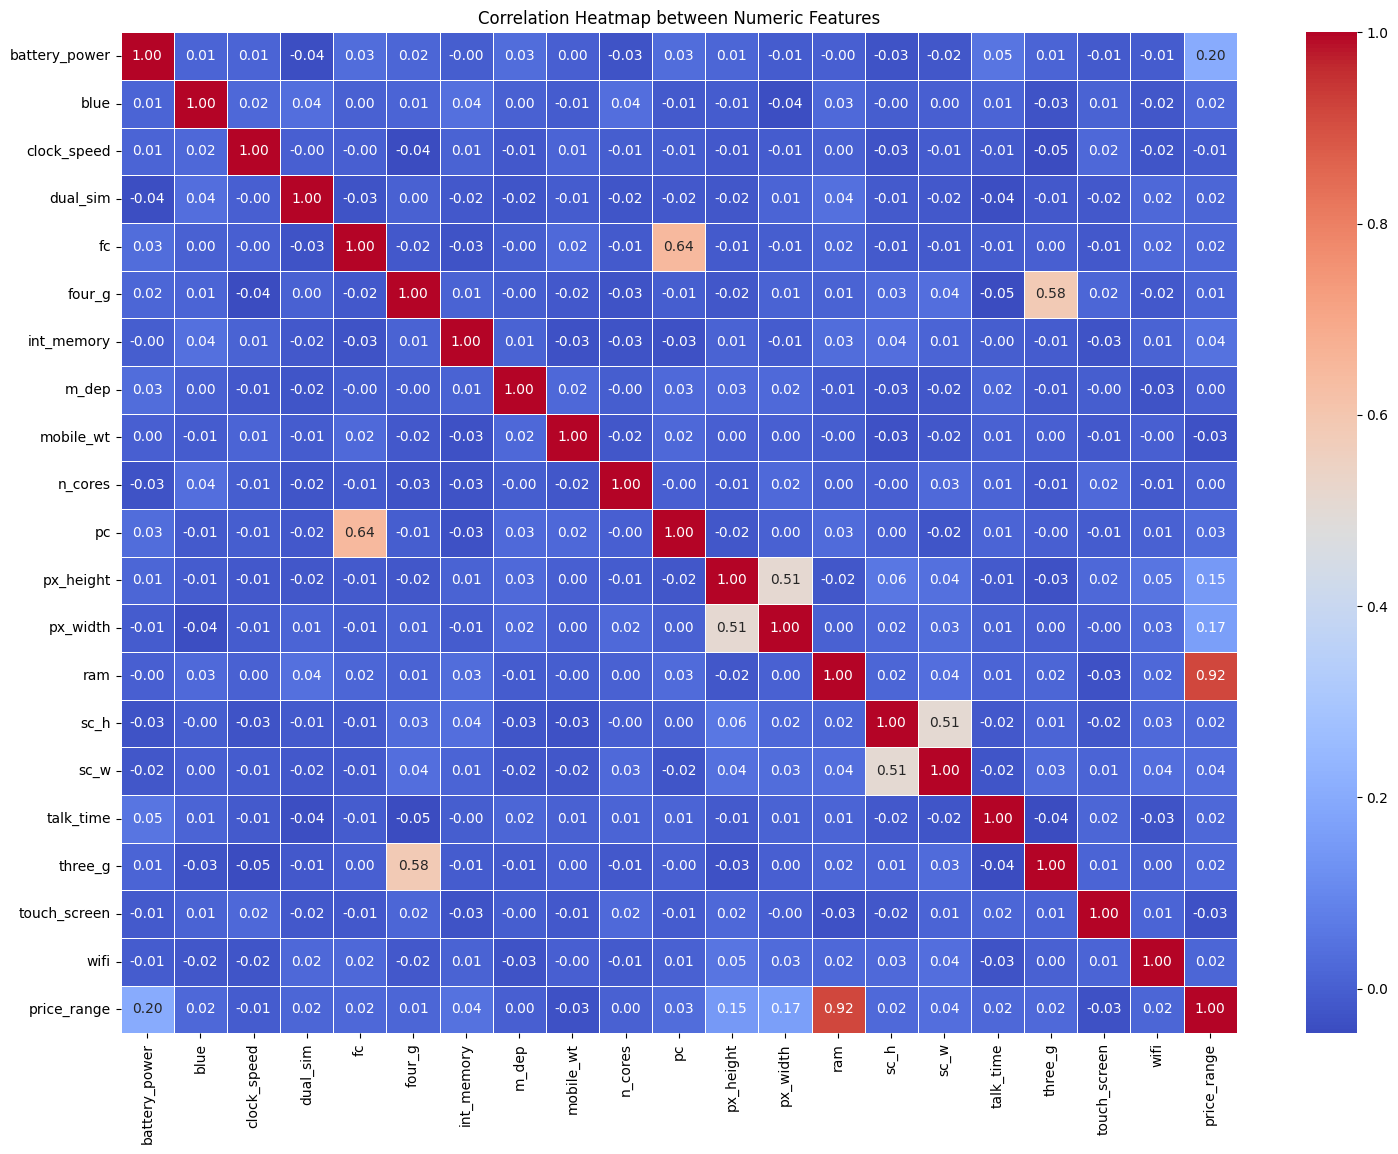

In [42]:
numerical_columns = [col for col in train.columns if train[col].dtypes != "object"]
# Menghitung matriks korelasi antar fitur numerik
corr = train[numerical_columns].corr()

plt.figure(figsize=(18, 13))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap between Numeric Features')
plt.show()

In [43]:
train1 =train.copy()
test1 =test.copy()
train2 =train.copy()
test2 =test.copy()

In [44]:
X = train1.drop(columns=["price_range"])
Y = train1["price_range"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [45]:
scalers = [
    StandardScaler(),
]

In [46]:
models = [
    # ===================== Logistic Regression =====================
    ('Logistic Regression', LogisticRegression(max_iter=500), {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    }),

    # ===================== Support Vector Classifier =====================
    ('SVC', SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),

    # ===================== Decision Tree Classifier =====================
    ('Decision Tree', DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }),

    # ===================== Random Forest =====================
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),

    # ===================== XGBoost =====================
    ('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    })
]

In [47]:
def summarize_metrics(model_name,y_train,y_test,y_train_predict,y_test_predict, existing_train=None):

    scaler_names = {
        'StandardScaler': 'StandardScaler',
    }

    # Determine the name of the scaler
    scaler_name = scaler_names.get(type(scaler).__name__, 'No Scaling')


    # Generating classification reports
    train_report_dict = classification_report(y_train, y_train_predict, output_dict=True)
    test_report_dict = classification_report(y_test, y_test_predict, output_dict=True)

    # Extracting and rounding metrics for train
    accuracy_train = round(train_report_dict['accuracy'], 2)
    macro_avg_train = train_report_dict['macro avg']
    precision_train = round(macro_avg_train['precision'], 2)
    recall_train = round(macro_avg_train['recall'], 2)
    f1_train = round(macro_avg_train['f1-score'], 2)

    # Extracting and rounding metrics for test
    accuracy_test = round(test_report_dict['accuracy'], 2)
    macro_avg_test = test_report_dict['macro avg']
    precision_test = round(macro_avg_test['precision'], 2)
    recall_test = round(macro_avg_test['recall'], 2)
    f1_test = round(macro_avg_test['f1-score'], 2)

    # Create a summary dictionary
    summary_dict = {
        'Model': model_name,
        'Scaling Method': scaler_name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train F1-Score': f1_train,
        'Test F1-Score': f1_test
    }

    summary_train = pd.DataFrame([summary_dict])

    # Append to existing DataFrame or return new DataFrame
    if existing_train is not None:
        return pd.concat([existing_train, summary_train], ignore_index=True)
    else:
        return summary_train

In [48]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test):
    """
    untuk melakukan hyperparameter tuning menggunakan GridSearchCV
    """
    # Fitting the data with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ # Best model

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Values for class", y_train.value_counts())

    # ============== Evaluation ===============
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return best_model

In [49]:
results_train = None

Running model: Logistic Regression with StandardScaler
Values for class price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.9825
Test Accuracy: 0.9750


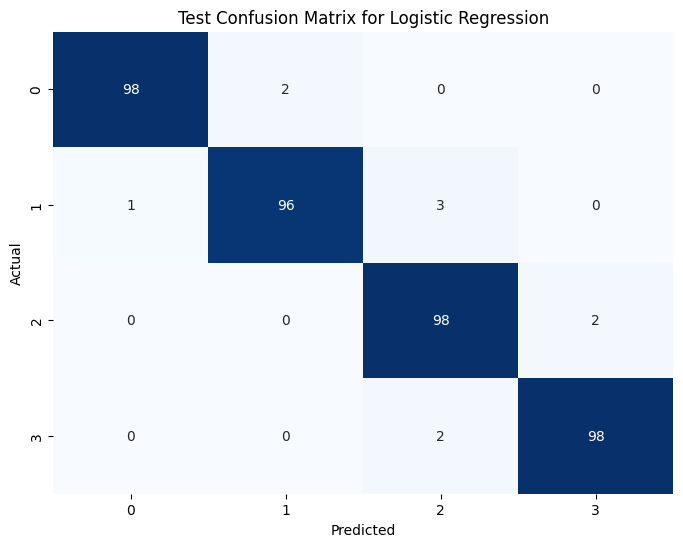



Classification Report for Logistic Regression on Test Set
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.98      0.96      0.97       100
           2       0.95      0.98      0.97       100
           3       0.98      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.97      0.98       400



Running model: SVC with StandardScaler
Values for class price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Training Accuracy: 0.9844
Test Accuracy: 0.9750


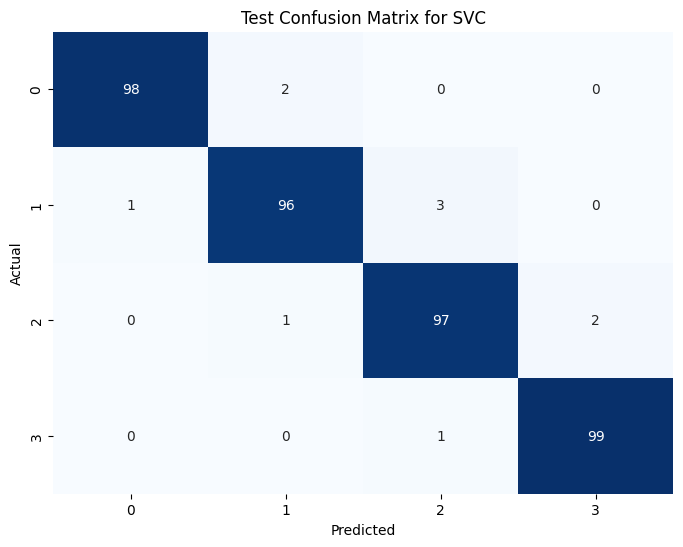



Classification Report for SVC on Test Set
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.97      0.96      0.96       100
           2       0.96      0.97      0.97       100
           3       0.98      0.99      0.99       100

    accuracy                           0.97       400
   macro avg       0.98      0.98      0.97       400
weighted avg       0.98      0.97      0.97       400



Running model: Decision Tree with StandardScaler
Values for class price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}
Training Accuracy: 0.9888
Test Accuracy: 0.8750


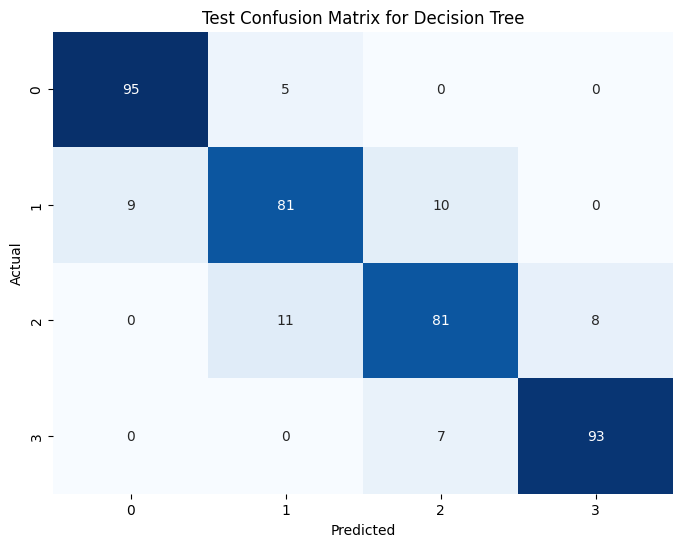



Classification Report for Decision Tree on Test Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       100
           1       0.84      0.81      0.82       100
           2       0.83      0.81      0.82       100
           3       0.92      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.87      0.88      0.87       400



Running model: Random Forest with StandardScaler
Values for class price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.9988
Test Accuracy: 0.8775


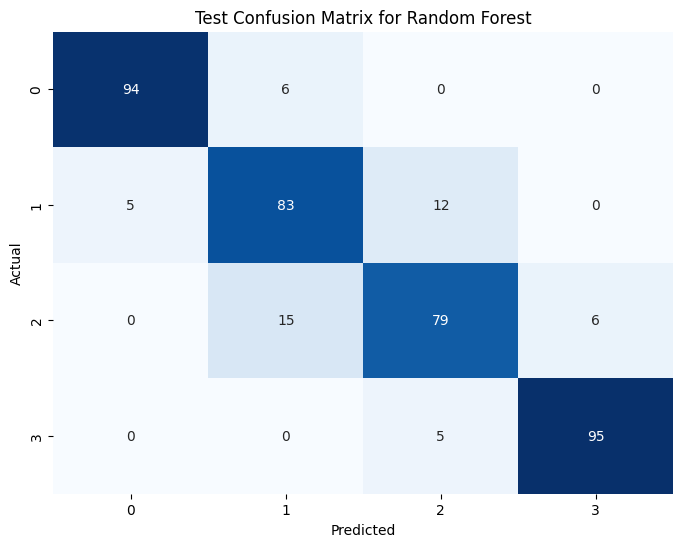



Classification Report for Random Forest on Test Set
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       100
           1       0.80      0.83      0.81       100
           2       0.82      0.79      0.81       100
           3       0.94      0.95      0.95       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



Running model: XGBoost with StandardScaler
Values for class price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.9300


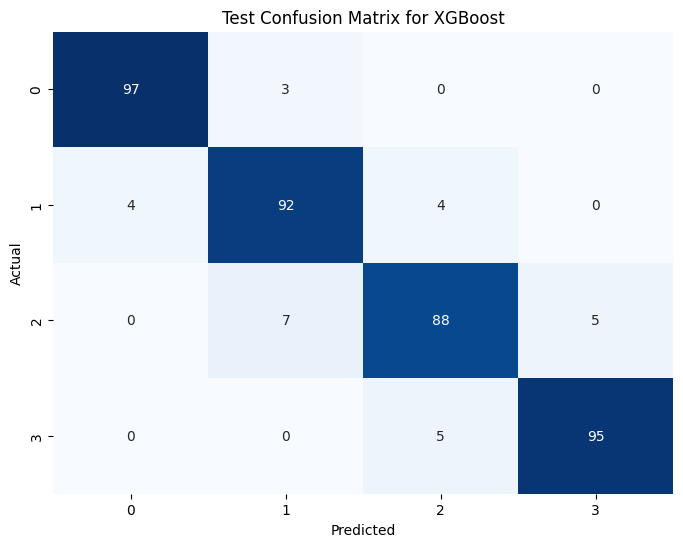



Classification Report for XGBoost on Test Set
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.90      0.92      0.91       100
           2       0.91      0.88      0.89       100
           3       0.95      0.95      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400





In [50]:
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


for scaler in scalers:
    # tahap scaling
    # melakukan scaling pada fitur pelatihan dan pengujian sebelum dilakukan pembagian data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model, param_grid in models:
        print(f"Running model: {model_name} with {scaler.__class__.__name__}")

        # ============== Hyperparameter Tuning (Finding best parameters) ==========
        # Mengirim data yang sudah di-scale ke fungsi tune_model
        best_model = tune_model(model, param_grid, X_train_scaled, Y_train, X_test_scaled, Y_test)

        # Predict using best model on scaled data
        y_train_pred = best_model.predict(X_train_scaled)
        y_test_pred = best_model.predict(X_test_scaled)

        # ======== Summarize and Evaluate ==============
        results_train = summarize_metrics(
            model_name,
            Y_train, Y_test, # Menggunakan Y_train dan Y_test asli untuk evaluasi
            y_train_pred, y_test_pred,
            existing_train=results_train
        )

        # ======== Visualize Confusion Matrices ==============
        plot_confusion_matrix(Y_test, y_test_pred, title=f"Test Confusion Matrix for {model_name}")
        print("\n=======================================================\n")

        # ======== Print Classification Report ==============
        print(f"Classification Report for {model_name} on Test Set")
        print(classification_report(Y_test, y_test_pred))

        print("\n=======================================================\n")

In [51]:
results_train

,Model,Scaling Method,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,Logistic Regression,StandardScaler,0.98,0.97,0.98,0.98,0.98,0.97,0.98,0.98
1,SVC,StandardScaler,0.98,0.97,0.98,0.98,0.98,0.98,0.98,0.97
2,Decision Tree,StandardScaler,0.99,0.88,0.99,0.87,0.99,0.88,0.99,0.87
3,Random Forest,StandardScaler,1.00,0.88,1.00,0.88,1.00,0.88,1.00,0.88
4,XGBoost,StandardScaler,1.00,0.93,1.00,0.93,1.00,0.93,1.00,0.93


In [52]:
import pickle

with open("model_dt.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model berhasil disimpan sebagai model_dt.pkl")


Model berhasil disimpan sebagai model_dt.pkl
